### Catatan <br>
Buat bagan tree pohon keputusan nanti kita lihat cara berpikirnya regresion. akurasi(evaluasi nya klasifikasi) dan mse(evaluasinya regresi)... wine ada 3 kelas 59,71,48 (0-2).

## Decision Tree

Decision Tree adalah metode pembelajaran terawasi (supervised learning) yang digunakan untuk tugas klasifikasi dan regresi. Cara kerjanya adalah dengan membagi dataset ke dalam subset berdasarkan nilai fitur, menciptakan struktur seperti pohon di mana setiap node internal merepresentasikan "uji" pada suatu fitur, setiap cabang merepresentasikan hasil dari uji tersebut, dan setiap node daun merepresentasikan label kelas (untuk klasifikasi) atau nilai (untuk regresi).

criterion: digunakan untuk metode pemisahan pada node (kotak), menggunakan 'gini' atau 'entropy' Entropy: mengukur ketidakpastian dalam set data, semakin rendah entropy, semakin tinggi nilai informasi yang didapat dari pemisahan
gini: mengukur seberapa sering elemen dalam dataset salah diklasifikasikan jika dipilih secara acak
<BR>• max_depth: Mengukur kedalaman maksimal dari pohon untuk mengontrol overfitting

## Decision Tree Classifer

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split #testing dan train
from sklearn.tree import DecisionTreeClassifier #Model
from sklearn import tree #buat bikin bagan pohon
from sklearn.metrics import accuracy_score # akurasi score

In [ ]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [ ]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [ ]:
wine = load_wine() #panggil data
#wine
x = wine.data #fitur
y = wine.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=0)

In [ ]:
model1 = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=0 )
# training time
model1.fit(x_train, y_train)

#membuat prediksi
y_pred = model1.predict(x_test)

#evaluasi model
akurasi = accuracy_score(y_test, y_pred)
print(f'Hasil Akurasi = {akurasi * 100:.2f}%')

print('Data hasil prediksi \n', y_pred)
print('Data asli \n',y_test)

Hasil Akurasi = 97.22%
Data hasil prediksi 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 0 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]
Data asli 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]


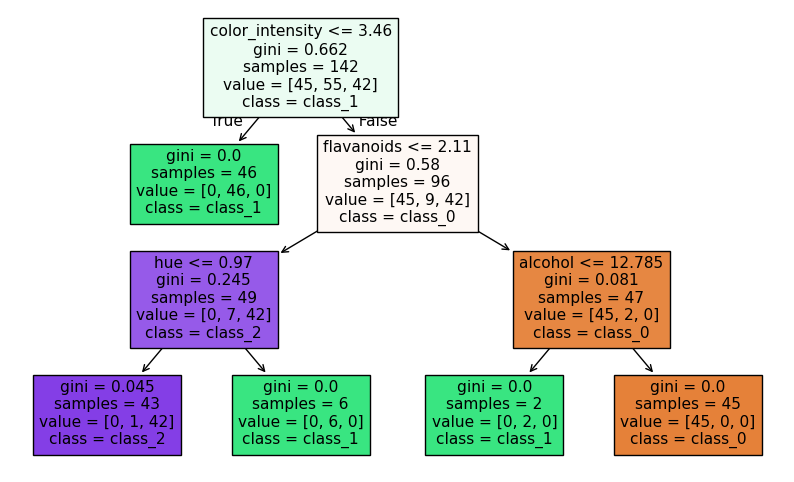

In [ ]:
#Visualisasikan Decision Tree
plt.figure(figsize = (10,6)) #panjang x lebar
tree.plot_tree(model1, feature_names = wine.feature_names,
               class_names = wine.target_names,filled=True)
plt.show()

#Decision Tree Regressor

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor #Model
from sklearn.metrics import mean_squared_error #mse

In [ ]:
diabetes = load_diabetes()
x = diabetes.data[:,:2] #mengambil 2 data pertama (0 sampai 1), jika soal mengambil data ke 2 sampai ketiga , berarti 2-4
y = diabetes.target

In [ ]:
diabetes.feature_names #bmi = body max index , bp = blood preasure

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [ ]:
#split data test = 22.5%
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.225, random_state=0)

Hasil MSE = 5454.718606490929


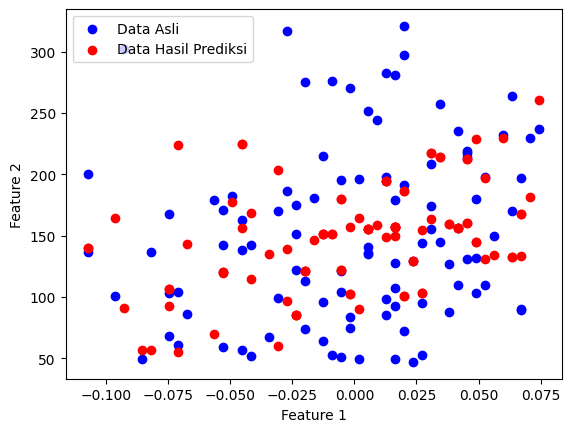

In [ ]:
model2 = DecisionTreeRegressor(random_state=0)
#Training Model
model2.fit(x_train, y_train)

#prediksi
y_pred = model2.predict(x_test)

#Evaluasi
mse = mean_squared_error(y_test, y_pred)
print(f'Hasil MSE = {mse}') #kalau ada f pasti ada kurung kurawal

#plot
plt.scatter(x_test[:,0], y_test, color='blue', label='Data Asli')
plt.scatter(x_test[:,0], y_pred, color='red', label='Data Hasil Prediksi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

catatan : jika di prusaahan disuruh prediksi budget kalau beda sedikit aja itu mse nya bisa jutaan.. Decision beda dengan regresi yang satu baris

#Support Vector Machine
(direkomendasikan karena lengkap)

Support Vector Machine (SVM) adalah algoritma pembelajaran terawasi yang digunakan untuk tugas klasifikasi dan regresi. Algoritma ini bekerja dengan menemukan hyperplane optimal (pada klasifikasi) atau garis (pada regresi) yang paling baik memisahkan data

Kernel:

• Linear Kernel: digunakan ketika data dapat dipisahkan secara linier. Kernel ini menghitung produk dalam antara dua vektor, dan cocok untuk dataset yang dapat dipisahkan dengan garis lurus.

• RBF (Radial Basis Function Kernel): adalah kernel non-linear yang banyak digunakan dalam SVM. Kernel ini bekerja dengan memetakan data ke dalam ruang dimensi yang lebih tinggi, membuat data yang tidak dapat dipisahkan secara linier dalam ruang asli menjadi dapat dipisahkan di ruang yang lebih tinggi.

• Polynomial Kernel: adalah kerner non-linear yang cocok untuk dataset yang memiliki hubungan non-linear antara fitur. ini memungkinkan SVM untuk memisahkan data menggunakan kurva polinomial.

• Sigmoid Kernel: Berasal dari fungsi aktivasi sigmoid yang digunakan dalam jaringan saraf tiruan (neurak networks). ini bekerja dengan memetakan titik data keruang dimensi yang lebih tinggi dengan menggunakan fungsi sigmoid.


In [ ]:
from sklearn.svm import SVC
wine = load_wine()
x = wine.data
y = wine.target

In [ ]:
x_train ,x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.2, random_state=0)

model3 = SVC(kernel = 'linear') #poly, rbf, sigmoid

#training
model3.fit(x_train,y_train)

#prediksi
y_pred = model3.predict(x_test)

akurasi = accuracy_score(y_test, y_pred)
print(f'Hasil prediksi = {akurasi * 100:.2f}%')
print('Data asli \n', y_test)
print('Data Prediksi \n', y_pred)

Hasil prediksi = 97.22%
Data asli 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 1 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]
Data Prediksi 
 [0 2 1 0 1 1 0 2 1 1 2 2 0 1 2 1 0 0 2 0 1 0 0 1 1 1 1 1 1 2 0 0 1 0 0 0]


Hasil Mean Squared Error = 3438.4878514921766


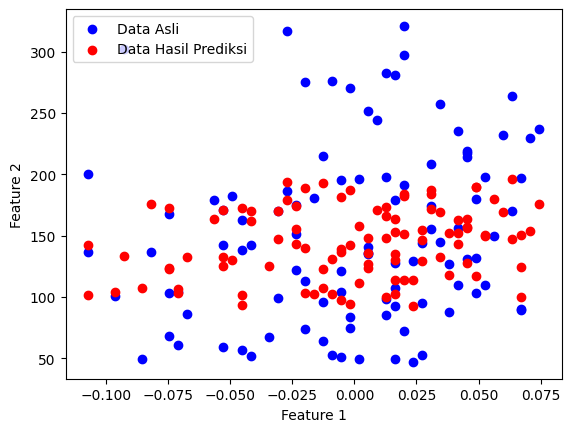

In [ ]:
from sklearn.svm import SVR
wine = load_diabetes()
x = diabetes.data
y = diabetes.target

x_train ,x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.225, random_state=0)

model4 = SVR(kernel = 'sigmoid') #poly, rbf, sigmoid

#training
model4.fit(x_train,y_train)

#prediksi
y_pred = model4.predict(x_test)

#evaluasi
mse = mean_squared_error(y_test, y_pred)
print(f'Hasil Mean Squared Error =', mse)
#plot
plt.scatter(x_test[:,0], y_test, color='blue', label='Data Asli')
plt.scatter(x_test[:,0], y_pred, color='red', label='Data Hasil Prediksi')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

Catatan di ujian : contoh coba tampilkankernel paling baik.. MSE paling kecil paling baik